## Regression

### Importing data for supervised learning


In [52]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df.life
X = df.fertility

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.values.shape))
print("Dimensions of X before reshaping: {}".format(X.values.shape))

# Reshape X and y
y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [55]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### Exploring the Gapminder data

http://seaborn.pydata.org/generated/seaborn.heatmap.html

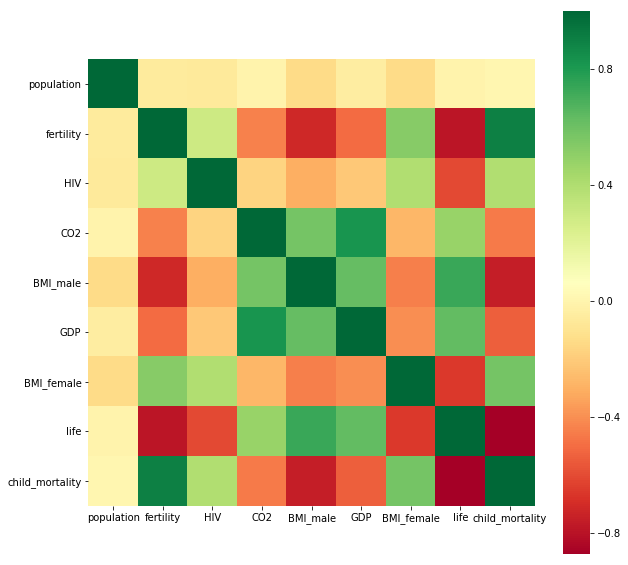

In [34]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', fmt= '.1f', ax=ax);

### Fit & predict for regression

0.6192442167740035


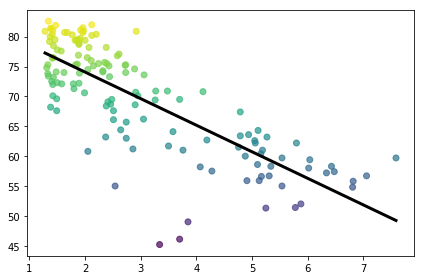

In [22]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create the regressor: reg
reg = LinearRegression()

X_fertility = X.copy()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, c=y, alpha=.7)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.tight_layout()
plt.show();

### Train/test split for regression

In [23]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907495
Root Mean Squared Error: 4.194027914110241


In [24]:
X_train.shape

(97, 1)

In [25]:
y_train.shape

(97, 1)

In [26]:
X.shape

(139, 1)

### 5-fold cross-validation

In [36]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### K-Fold CV comparison

In [38]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit  cvscores_3 = cross_val_score(reg , X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit  cvscores_10 = cross_val_score(reg , X, y, cv=10)
print(np.mean(cvscores_10))

2.78 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.6294715754653505
8.66 ms ± 526 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.5883937741571186


### Regularized regression

In [56]:
y = df.life.values

In [59]:
y.shape

(139,)

In [65]:
X = df.drop(['life', 'Region'], axis=1)

In [66]:
X.shape

(139, 8)

In [67]:
df_columns = X.columns
X = X.values

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


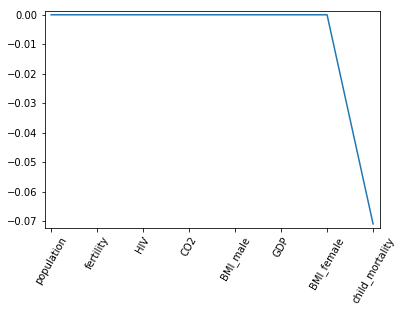

In [68]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [50]:
df_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Regularization II: Ridge

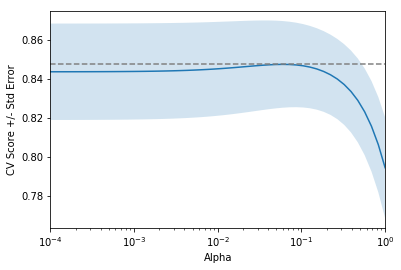

In [70]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? 

In [69]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()